In [9]:
import scipy.linalg
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [10]:
print ("One tailed")

for alpha in [.05, .01, .001]:
    p = 1-alpha
    print(f"alpha={alpha:7},\tz_score = {norm.ppf(p):20}")


One tailed
alpha=   0.05,	z_score =   1.6448536269514722
alpha=   0.01,	z_score =   2.3263478740408408
alpha=  0.001,	z_score =    3.090232306167813


In [11]:
print ("Two tailed")

for alpha in [.05, .01, .001]:
    p = 1-alpha/2
    print(f"alpha={alpha:7},\tz_score = {norm.ppf(p):20}")


Two tailed
alpha=   0.05,	z_score =    1.959963984540054
alpha=   0.01,	z_score =   2.5758293035489004
alpha=  0.001,	z_score =   3.2905267314919255


In [12]:
print ("One tailed T")

for alpha in [.05, .01, .001]:
    p = 1-alpha
    print(f"alpha={alpha:7},\tz_score = {t.ppf(p, df=1):20}")

One tailed T
alpha=   0.05,	z_score =    6.313751514800932
alpha=   0.01,	z_score =    31.82051595375758
alpha=  0.001,	z_score =    318.3088389855419


In [13]:
print ("Two tailed T")

for alpha in [.05, .01, .001]:
    p = 1-alpha/2
    print(f"alpha={alpha:7},\tz_score = {t.ppf(p, df=1):20}")

Two tailed T
alpha=   0.05,	z_score =   12.706204736432095
alpha=   0.01,	z_score =    63.65674116287399
alpha=  0.001,	z_score =    636.6192494318556


In [19]:
def t_test(x_bar, y_bar, s, n):
    difference_of_means = x_bar - y_bar
    return (difference_of_means * np.sqrt(n))/ s


In [20]:
x_bar = y_bar =1
sample_std = .5
n=10000

t_test(x_bar, y_bar, sample_std, n)

0.0

In [23]:
# One sample t-test
# one group - test whether the mean of my sample could have been drawn from a population with a specific mean
# e.g. test whether the mean charge from my sample is significantly different than 12,000
# eg estimate the probability of the null hypothesis that our sample set of students have a mean IQ of 100

# Use the population mean for y_bar (sample_mean - populatino_mean) s/sqrt(n)
sample_mean = 80
h_null_mean = 100  # this is actually the NULL HYpothesis mean
sample_std = .5
n=10000

t_n_minus_1 = t_test(sample_mean, h_null_mean, sample_std, n)
t_n_minus_1

-4000.0

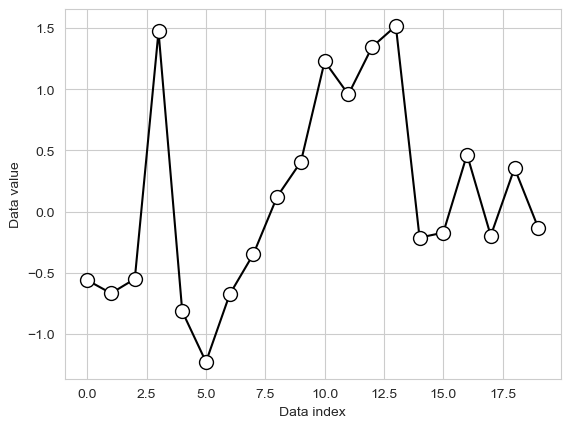

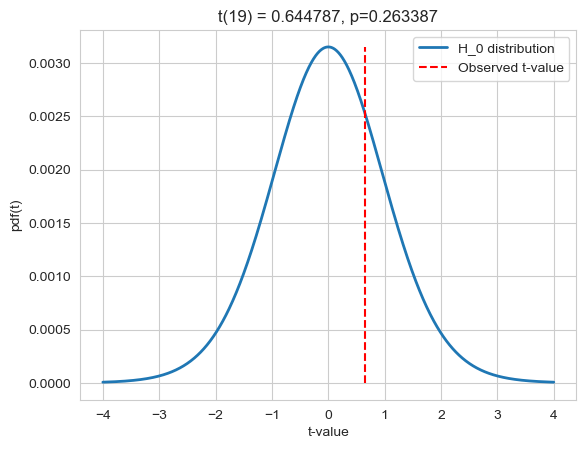

In [25]:


## generate the data

# parameters
N = 20  # sample size
popMu = .5 # true population mean
data  = np.random.randn(N) + popMu

# let's see what the data look(s) like
plt.plot(data,'ko-',markerfacecolor='w',markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

### question: Should there be lines in this plot?


# In[ ]:


## "manual" t-test

# the null-hypothesis value
H0val = 0

# compute the t-value
t_num = np.mean(data) - H0val
t_den = np.std(data) / np.sqrt(N)
tval = t_num / t_den

# degrees of freedom
df = N-1

# p-value
pval = 1-t.cdf(abs(tval),df)

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
plt.show()